In [1]:
%pylab inline
import libsgfdata
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Loading data

In [2]:
data = libsgfdata.SGFData("../multi.sgf")

While the SGF standard clearly says that files should be encoded using latin-1, this is often not true in practice. In particular a lot of files found in the wild have been edited by hand in e.g. Notepad on Windows. We try to auto-detect encoding usning cchardet, and default to latin-1 if the detection is less than 85% certain. This sometimes fails though. To solve this, you can supply the correct encoding:

In [3]:
data = libsgfdata.SGFData("../multi.sgf", encoding="iso-8859-15")

Note that it is unlikely that a failed detection leads to a failure to parse the file: Most common confusions are between different latin- charsets, and using the wrong one of these will only lead to non-ascii characters in text fields being wrong, not the entire file failing to read.

## Normalization
Some of the non-standard extensions to the SGF data format, such as the Geotech AB extension, provide non-standard fields with overlapping sematics with some standard fields (e.g. HD vs RefDatum). These fields can optionally be normalized (renamed) on load:

In [2]:
data = libsgfdata.SGFData("../multi.sgf", normalize=True)

or alternatively later using

In [3]:
data.main["projection"] = 4326
data.main.loc[0, "projection"] = 5110

In [4]:
data = data.normalize()

In [6]:
data

/home/redhog/Projects/Emerald/emerald-interpret-gui/env/lib/python3.9/site-packages/numpy/lib/function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/home/redhog/Projects/Emerald/emerald-interpret-gui/env/lib/python3.9/site-packages/numpy/lib/function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
/home/redhog/Projects/Emerald/emerald-interpret-gui/env/lib/python3.9/site-packages/numpy/lib/function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/home/redhog/Projects/Emerald/emerald-interpret-gui/env/lib/python3.9/site-packages/numpy/lib/function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


Geotechnical data
Soundings: 3
Depths: 514
     x_coordinate  y_coordinate
min           0.0           0.0
max           inf           inf
            depth
count  514.000000
mean     3.887811
std      1.801525
min      0.025000
25%      2.542500
50%      3.967500
75%      5.395000
max      7.040000
       feed_thrust_force
count              253.0
mean                 0.0
std                  0.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                  0.0

In [10]:
data.main[["x_orig", "y_orig", "x_web", "y_web", "x_coordinate", "y_coordinate"]]

,x_orig,y_orig,x_web,y_web,x_coordinate,y_coordinate
0,0.000,0.000,1.016698e+06,6.276013e+06,0.000,0.000
0,99592.836,1210182.118,1.168045e+06,8.374586e+06,99592.836,1210182.118
1,NaN,NaN,NaN,NaN,inf,inf


# Data access

Note that while in practice it is very uncommon for the main section to have multiple rows
for a single borehole, it is possible

In [6]:
data.data

,depth,cone_tip_resistance_uncorr,friction_uncorr,measured_pore_pressure,inclination,penetration_rate,feed_thrust_force,time,allocated_value_during_performance_of_sounding,zero_value_tip_pressure,...,zero_value_pore_pressure,comments,investigation_point,feed_trust_force,interval,pumping_rate,extra_spin,flushing,pumping,ramming
0,2.000,0.000,0.0,0.0,0.0,0.0,0.0,1064468.0,tilt_derivative_alarm,7.7423,...,389.3,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.020,3.617,48.0,14.0,2.6,20.0,0.0,1070468.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.040,3.793,60.0,17.0,2.8,18.0,0.0,1071593.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.060,2.424,101.0,34.0,2.8,1.0,0.0,1078406.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.080,2.639,103.0,36.0,2.8,22.0,0.0,1079156.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,6.425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,no_comment,None,8209.0,474.0,22.0,1.0,0.0,0.0,1.0
257,6.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,no_comment,None,9129.0,495.0,27.0,1.0,0.0,0.0,1.0
258,6.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,no_comment,None,9002.0,520.0,27.0,1.0,0.0,0.0,1.0
259,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,no_comment,None,8933.0,461.0,26.0,1.0,0.0,0.0,1.0


In [8]:
data.id_col

'investigation_point'

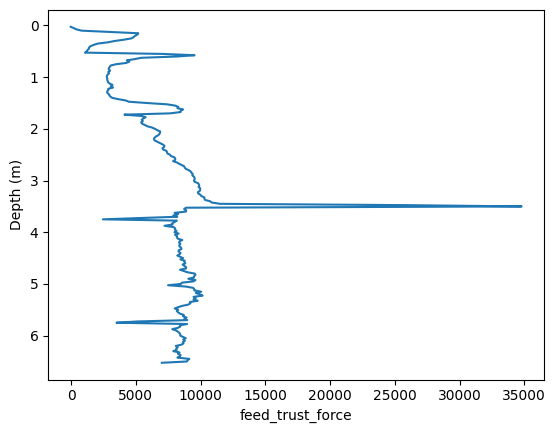

In [7]:
borehole = data.data[data.data.investigation_point == 'None']
plt.plot(borehole.feed_trust_force, borehole.depth)
plt.ylim((plt.ylim()[1], plt.ylim()[0]))
plt.xlabel("feed_trust_force")
plt.ylabel("Depth (m)")
plt.show()

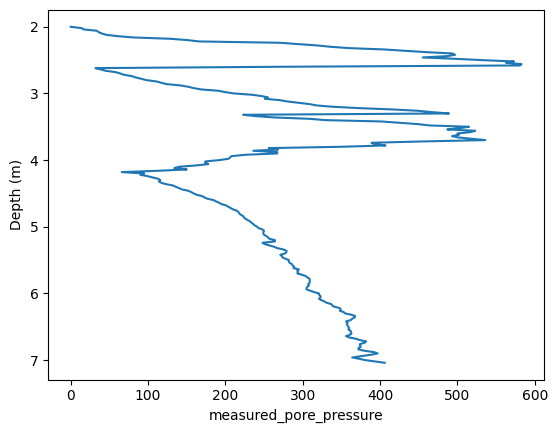

In [30]:
borehole = data.data[data.data.investigation_point == 1001]
plt.plot(borehole.measured_pore_pressure, borehole.depth)
plt.ylim((plt.ylim()[1], plt.ylim()[0]))
plt.xlabel("measured_pore_pressure")
plt.ylabel("Depth (m)")
plt.show()

In [48]:
borehole = data.data[data.data.investigation_point == 1001]

In [52]:
borehole[["depth", "comments"]]

,depth,comments
0,2.00,no_comment
1,2.02,no_comment
2,2.04,no_comment
3,2.06,no_comment
4,2.08,no_comment
...,...,...
248,6.96,no_comment
249,6.98,no_comment
250,7.00,no_comment
251,7.02,no_comment


In [55]:
libsgfdata.data

,name,unit,format,remark,type,source,normalization,conv,ident
code,,,,,,,,,
%,Time of measurement,ms,NaN,NaN,milliseconds,geotechab,AD,NaN,time_of_measurement
A,Feed thrust force,kN,figure,NaN,NaN,sgf,NaN,NaN,feed_thrust_force
AA,Rotary angle,degrees,figure,NaN,NaN,sgf,NaN,NaN,rotary_angle
AB,Torque,Nm,figure,NaN,NaN,sgf,NaN,NaN,torque_nm
AB2,"Torque, remoulded",Nm,NaN,NaN,NaN,sgf,NaN,NaN,torque_remoulded
...,...,...,...,...,...,...,...,...,...
VS,Value at that specific point,m/s,NaN,NaN,NaN,sgf,NaN,NaN,value_at_that_specific_point_m_s
W,Load,kN,NaN,NaN,NaN,sgf,NaN,NaN,load
Zdiff,Calculated settlement relative to reference me...,Mm,NaN,NaN,NaN,sgf,NaN,NaN,calculated_settlement_relative_to_reference_me...


In [10]:
data.normalize()

Geotechnical data
Soundings: 3
Depths: 514
     x_coordinate  y_coordinate
min         0.000         0.000
max     99592.836   1210182.118
            depth
count  514.000000
mean     3.887811
std      1.801525
min      0.025000
25%      2.542500
50%      3.967500
75%      5.395000
max      7.040000
       feed_thrust_force
count              253.0
mean                 0.0
std                  0.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                  0.0

# Saving data

In [11]:
data.dump("../test.sgf")

# Static metadata
For each of the block types there is a pandas dataframe with description and measurement unit (if any) for the fields:


In [45]:
libsgfdata.main.head()

,name,unit,format,remark,type,source,normalization,conv,ident
code,,,,,,,,,
CA,"Skalfaktor, elektrisk konduktivitet",NaN,NaN,NaN,NaN,geotechab,NaN,NaN,skalfaktor_elektrisk_konduktivitet
CB,"Inverteringsfaktor, konduktivitet",NaN,NaN,NaN,NaN,geotechab,NaN,NaN,inverteringsfaktor_konduktivitet
CSN,Serienummer CPT-sond,NaN,NaN,NaN,NaN,geotechab,NaN,NaN,serienummer_cpt_sond
EZTE,Tid nollinläsning efter sondering (Nova-sond),NaN,NaN,NaN,NaN,geotechab,NaN,NaN,tid_nollinlasning_efter_sondering_nova_sond
FoderDim,Dimension casing tube (Dy/Di),mm,Figure,NaN,NaN,sgf,NaN,NaN,dimension_casing_tube_dy_di


In [13]:
libsgfdata.data.head()

,name,unit,format,remark,type,source,normalization,conv,ident
code,,,,,,,,,
%,Time of measurement,ms,NaN,NaN,milliseconds,geotechab,AD,NaN,time_of_measurement
A,Feed thrust force,kN,figure,NaN,NaN,sgf,NaN,NaN,feed_thrust_force
AA,Rotary angle,degrees,figure,NaN,NaN,sgf,NaN,NaN,rotary_angle
AB,Torque,Nm,figure,NaN,NaN,sgf,NaN,NaN,torque_nm
AB2,"Torque, remoulded",Nm,NaN,NaN,NaN,sgf,NaN,NaN,torque_remoulded


In [14]:
libsgfdata.method.head()

,name,format,unit,remark,type,source,normalization,conv,ident
code,,,,,,,,,
AN,Start depth,Numeral,m,metres under pipe top,NaN,sgf,NaN,NaN,start_depth
AO,End depth,Numeral,m,NaN,NaN,sgf,NaN,NaN,end_depth
Ant-f,Screened/unscreened,NaN,NaN,NaN,NaN,sgf,NaN,NaN,screened_unscreened
Ant-typ,Antenna type,NaN,NaN,e.g. unshielded 50 MHz,NaN,sgf,NaN,NaN,antenna_type
DynTyp,Type of impact cushion,NaN,NaN,loose or solid,NaN,sgf,NaN,NaN,type_of_impact_cushion


In addition, for the two enumeration fields, comment and method, there are similar tables

In [15]:
libsgfdata.methods.head()

,name,reference,group,source,ident
code,,,,,
-1,Unknown,NaN,NaN,NaN,unknown
10,Impact soundingQ,"Field Manual, SGF Report 1:2013",Traditional Swedish and Nordic field methods t...,NaN,impact_soundingq
101,"Weight sounding test, manual",SIS-CEN ISO/TS 22476-10:2005 or “Method descri...,European field methods included in SGF’s forma...,NaN,weight_sounding_test_manual
102,"Weight sounding test, mechanical",SIS-CEN ISO/TS 22476-10:2005 or “Method descri...,European field methods included in SGF’s forma...,NaN,weight_sounding_test_mechanical
107A,"Cone penetration test , CPTU (with pore pressu...",SS EN ISO 22476-1,European field methods included in SGF’s forma...,NaN,cone_penetration_test_cptu_with_pore_pressure_...


In [16]:
libsgfdata.comments.head()

,name,text,remark,group,ident
code,,,,,
-1,No comment,NaN,NaN,NaN,no_comment
0,Previous code error,NaN,NaN,General codes,previous_code_error
1,Start level following code,NaN,NaN,General codes,start_level_following_code
2,Method replacement,2,NaN,General codes,method_replacement
3,Additional information,3,NaN,General codes,additional_information


# Making a new SGF file from scratch

In [33]:
b = libsgfdata.SGFData()

In [36]:
b.main = pd.DataFrame({"investigation_point": ["foo1"], "x_coordinate": [1], "y_coordinate": [1], "z_coordinate": [1]})
b.data = pd.DataFrame({"investigation_point": ["foo1", "foo1"], "depth": [0, 1], "feed_trust_force": [22, 23]})


In [37]:
b

Geotechnical data
Soundings: 1
Depths: 2
     x_coordinate  y_coordinate
min           1.0           1.0
max           1.0           1.0
          depth
count  2.000000
mean   0.500000
std    0.707107
min    0.000000
25%    0.250000
50%    0.500000
75%    0.750000
max    1.000000

In [38]:
b.dump("../test2.sgf")

In [40]:
libsgfdata.SGFData("../test2.sgf")

Geotechnical data
Soundings: 1
Depths: 2
     x_coordinate  y_coordinate
min           1.0           1.0
max           1.0           1.0
          depth
count  2.000000
mean   0.500000
std    0.707107
min    0.000000
25%    0.250000
50%    0.500000
75%    0.750000
max    1.000000